In [1]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature
from wrf import (to_np, getvar, smooth2d, get_cartopy, cartopy_xlim,
                 cartopy_ylim, latlon_coords, ALL_TIMES,interpline, CoordPair, xy_to_ll, ll_to_xy)
import pandas as pd
import numpy as np
import os
import shutil
import re
import netCDF4 as nc
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter,LatitudeFormatter
import matplotlib.ticker as mticker
import cartopy.crs as ccrs                                               
import cartopy.feature as cf
import matplotlib.pyplot as plt
import glob
from scipy.stats import norm
from scipy import stats
import seaborn as sns
import shapefile
import geopandas as gpd
from matplotlib.backends.backend_pdf import PdfPages
from palettable.lightbartlein.diverging import BlueDarkRed18_18

# information

In [2]:
ds_lu_2010s = xr.open_dataset('wrfout_d04_2011-06-23_11:00:00')
lu_2010s = ds_lu_2010s['LU_INDEX']

lu_2010s = lu_2010s[0,:,:]

In [3]:
ds_lu_2040s = xr.open_dataset('wrfout_d04_2040-06-18_23:00:00')
lu_2040s = ds_lu_2040s['LU_INDEX']

lu_2040s = lu_2040s[0,:,:]

# csv to xarray

2010s

In [4]:
HWD_1120 = pd.read_csv('HWD_1120_withgrids.csv')

HWD_1120 = HWD_1120.replace(9999,np.nan)

In [7]:
HWD_1120.sort_values(['south_north','west_east'],ascending=[True,True],inplace=True)

HWD_1120_values = HWD_1120.hwd.values 
HWD_1120_values = HWD_1120_values.reshape(162,213)

XLAT = lu_2010s.XLAT
XLONG = lu_2010s.XLONG
south_north = lu_2010s.south_north
west_east = lu_2010s.west_east

In [8]:
HWD_1120_xr = xr.DataArray(HWD_1120_values,
                           dims=["south_north","west_east"],
                           coords=dict(
                           XLONG=(["south_north", "west_east"], XLONG),
                           XLAT=(["south_north", "west_east"], XLAT)))

ds_ssp245_2010s = xr.Dataset({'ssp245_HWD_1120': HWD_1120_xr})

2040s

In [9]:
HWD_4049 = pd.read_csv('HWD_4049_withgrids.csv')

HWD_4049 = HWD_4049.replace(9999,np.nan)

In [11]:
HWD_4049.sort_values(['south_north','west_east'],ascending=[True,True],inplace=True)

HWD_4049_values = HWD_4049.hwd.values 
HWD_4049_values = HWD_4049_values.reshape(162,213)

XLAT = lu_2040s.XLAT
XLONG = lu_2040s.XLONG
south_north = lu_2040s.south_north
west_east = lu_2040s.west_east

In [12]:
HWD_4049_xr = xr.DataArray(HWD_4049_values,
                           dims=["south_north","west_east"],
                           coords=dict(
                           XLONG=(["south_north", "west_east"], XLONG),
                           XLAT=(["south_north", "west_east"], XLAT)))

ds_ssp245_2040s = xr.Dataset({'ssp245_HWD_4049': HWD_4049_xr})

2090s

In [13]:
HWD_9099 = pd.read_csv('HWD_9099_withgrids.csv')

HWD_9099 = HWD_9099.replace(9999,np.nan)

In [15]:
HWD_9099.sort_values(['south_north','west_east'],ascending=[True,True],inplace=True)

HWD_9099_values = HWD_9099.hwd.values 
HWD_9099_values = HWD_9099_values.reshape(162,213)

XLAT = lu_2040s.XLAT
XLONG = lu_2040s.XLONG
south_north = lu_2040s.south_north
west_east = lu_2040s.west_east

In [16]:
HWD_9099_xr = xr.DataArray(HWD_9099_values,
                           dims=["south_north","west_east"],
                           coords=dict(
                           XLONG=(["south_north", "west_east"], XLONG),
                           XLAT=(["south_north", "west_east"], XLAT)))

ds_ssp245_2090s = xr.Dataset({'ssp245_HWD_9099': HWD_9099_xr})

2040s_diff

In [17]:
diff_HWD_4049 = pd.read_csv('diff/HWD_diff_2040s.csv')

diff_HWD_4049 = diff_HWD_4049.replace(9999,np.nan)

In [20]:
diff_HWD_4049 = diff_HWD_4049.reset_index(drop=True)

In [21]:
diff_HWD_4049.sort_values(['south_north','west_east'],ascending=[True,True],inplace=True)

diff_HWD_4049_values = diff_HWD_4049['diff'].values 
diff_HWD_4049_values = diff_HWD_4049_values.reshape(162,213)

XLAT = lu_2040s.XLAT
XLONG = lu_2040s.XLONG
south_north = lu_2040s.south_north
west_east = lu_2040s.west_east

In [22]:
diff_HWD_4049_xr = xr.DataArray(diff_HWD_4049_values,
                           dims=["south_north","west_east"],
                           coords=dict(
                           XLONG=(["south_north", "west_east"], XLONG),
                           XLAT=(["south_north", "west_east"], XLAT)))

ds_diff_ssp245_2040s = xr.Dataset({'diff_ssp245_HWD_4049': diff_HWD_4049_xr})

2090s_diff

In [23]:
diff_HWD_9099 = pd.read_csv('HWD_diff_2090s_withgrids.csv')

diff_HWD_9099 = diff_HWD_9099.replace(9999,np.nan)

In [25]:
diff_HWD_9099 = diff_HWD_9099.reset_index(drop=True)

In [26]:
diff_HWD_9099.sort_values(['south_north','west_east'],ascending=[True,True],inplace=True)

diff_HWD_9099_values = diff_HWD_9099['diff'].values 
diff_HWD_9099_values = diff_HWD_9099_values.reshape(162,213)

XLAT = lu_2040s.XLAT
XLONG = lu_2040s.XLONG
south_north = lu_2040s.south_north
west_east = lu_2040s.west_east

In [27]:
diff_HWD_9099_xr = xr.DataArray(diff_HWD_9099_values,
                           dims=["south_north","west_east"],
                           coords=dict(
                           XLONG=(["south_north", "west_east"], XLONG),
                           XLAT=(["south_north", "west_east"], XLAT)))

ds_diff_ssp245_2090s = xr.Dataset({'diff_ssp245_HWD_9099': diff_HWD_9099_xr})

# plot

In [28]:
PRD = gpd.read_file('/home/zzuoaa/evaluation_CMIP6/May/fine_coastline/china_coastline.shp')

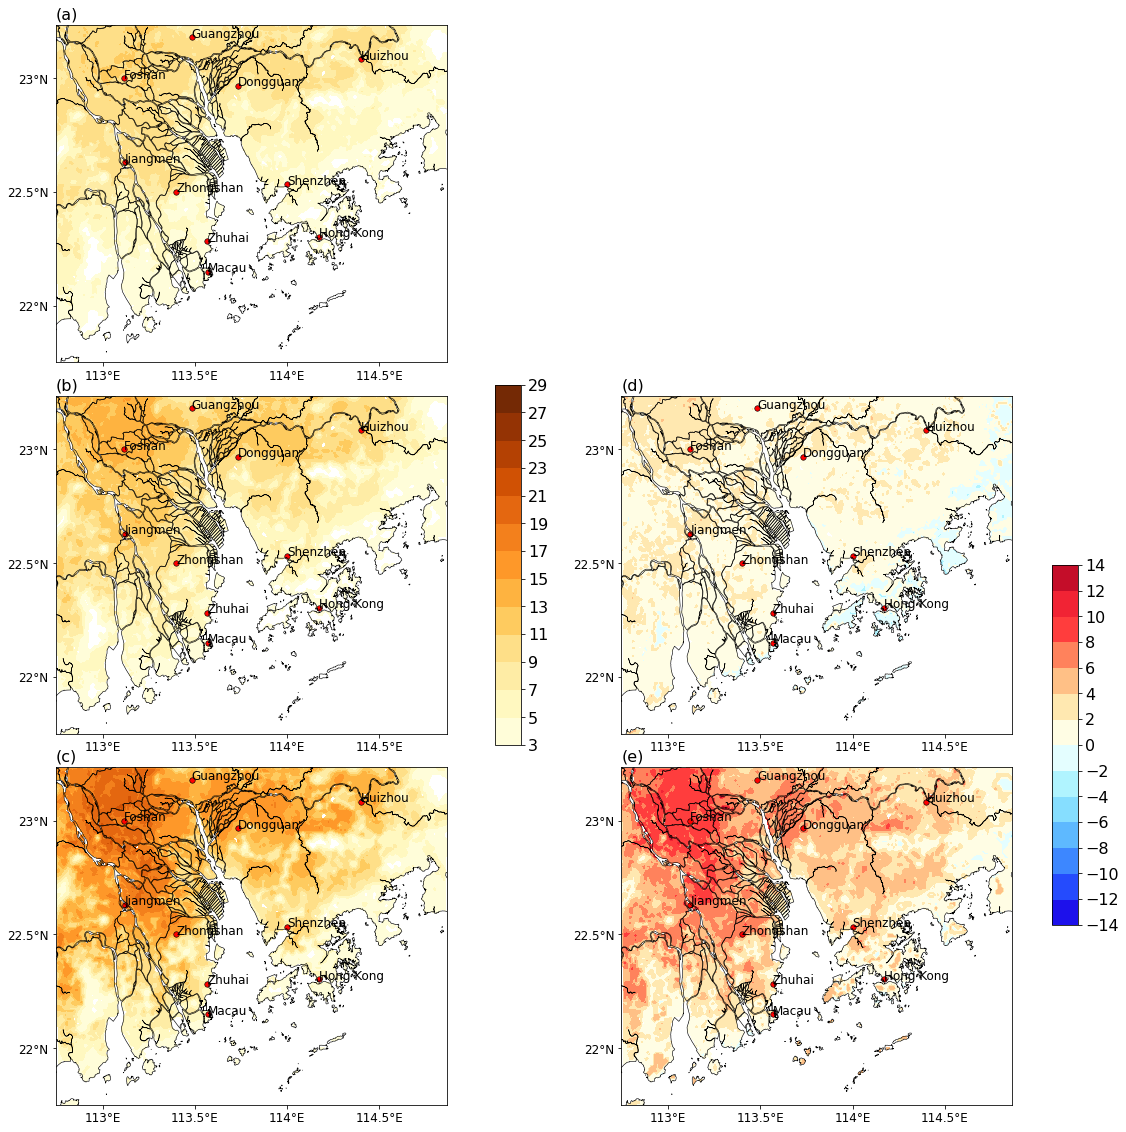

In [29]:
plt.rcParams["font.family"] = "DejaVu Sans"
font={'weight':'medium',
      'color':'black',
      'size':12}

fig,ax=plt.subplots(3,2,figsize=(18,25))
axes = ax.flatten()

ax1=axes[0]
ax2=axes[1].axis('off')
ax3=axes[2]
ax4=axes[3]
ax5=axes[4]
ax6=axes[5]

ax1 = PRD.geometry.plot(ax=ax1,edgecolor='black',facecolor='none',linewidth=0.6,linestyle='solid')
ax3 = PRD.geometry.plot(ax=ax3,edgecolor='black',facecolor='none',linewidth=0.6,linestyle='solid')
ax4 = PRD.geometry.plot(ax=ax4,edgecolor='black',facecolor='none',linewidth=0.6,linestyle='solid')
ax5 = PRD.geometry.plot(ax=ax5,edgecolor='black',facecolor='none',linewidth=0.6,linestyle='solid')
ax6 = PRD.geometry.plot(ax=ax6,edgecolor='black',facecolor='none',linewidth=0.6,linestyle='solid')

C11 = ax1.contourf(ds_ssp245_2010s.XLONG,ds_ssp245_2010s.XLAT,ds_ssp245_2010s.ssp245_HWD_1120,np.arange(3, 30, 2),\
                   cmap="YlOrBr")
C31 = ax3.contourf(ds_ssp245_2040s.XLONG,ds_ssp245_2040s.XLAT,ds_ssp245_2040s.ssp245_HWD_4049,np.arange(3, 30, 2),\
                   cmap="YlOrBr")
C51 = ax5.contourf(ds_ssp245_2090s.XLONG,ds_ssp245_2090s.XLAT,ds_ssp245_2090s.ssp245_HWD_9099,np.arange(3, 30, 2),\
                   cmap="YlOrBr")
C41 = ax4.contourf(ds_diff_ssp245_2040s.XLONG,ds_diff_ssp245_2040s.XLAT,ds_diff_ssp245_2040s.diff_ssp245_HWD_4049,\
                   np.arange(-14, 16, 2),cmap=BlueDarkRed18_18.mpl_colormap)
C61 = ax6.contourf(ds_diff_ssp245_2090s.XLONG,ds_diff_ssp245_2090s.XLAT,ds_diff_ssp245_2090s.diff_ssp245_HWD_9099,\
                   np.arange(-14, 16, 2),cmap=BlueDarkRed18_18.mpl_colormap)

###############################################################marker
obs_gd = pd.read_csv('/home/zzuoaa/evaluation_CMIP6/May/city_name.csv')

station_name = obs_gd.city

sc1 = ax1.scatter(obs_gd.lon,obs_gd.lat, s=30, c='red',\
                  edgecolors='black',linewidths=0.6)
sc2 = ax3.scatter(obs_gd.lon,obs_gd.lat, s=30, c='red',\
                  edgecolors='black',linewidths=0.6)
sc3 = ax4.scatter(obs_gd.lon,obs_gd.lat, s=30, c='red',\
                  edgecolors='black',linewidths=0.6)
sc4 = ax5.scatter(obs_gd.lon,obs_gd.lat, s=30, c='red',\
                  edgecolors='black',linewidths=0.6)
sc5 = ax6.scatter(obs_gd.lon,obs_gd.lat, s=30, c='red',\
                  edgecolors='black',linewidths=0.6)



for i in range(len(obs_gd.lon)):
    ax1.annotate(station_name[i],xy=(obs_gd.lon[i],obs_gd.lat[i]),xytext=(obs_gd.lon[i],obs_gd.lat[i]),size=12)
    ax3.annotate(station_name[i],xy=(obs_gd.lon[i],obs_gd.lat[i]),xytext=(obs_gd.lon[i],obs_gd.lat[i]),size=12)
    ax4.annotate(station_name[i],xy=(obs_gd.lon[i],obs_gd.lat[i]),xytext=(obs_gd.lon[i],obs_gd.lat[i]),size=12)
    ax5.annotate(station_name[i],xy=(obs_gd.lon[i],obs_gd.lat[i]),xytext=(obs_gd.lon[i],obs_gd.lat[i]),size=12)
    ax6.annotate(station_name[i],xy=(obs_gd.lon[i],obs_gd.lat[i]),xytext=(obs_gd.lon[i],obs_gd.lat[i]),size=12)
###############################################################marker

fig.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=0.9, 
                    top=0.8, 
                    wspace=0.2, 
                    hspace=0.1)


position_1 = fig.add_axes([0.47, 0.4, 0.02, 0.2])#位置[左,下,右,上]
cb_1 = fig.colorbar(C11, cax=position_1,fraction=0.05)
cb_1.set_label('',fontdict=font)
cb_1.set_ticks(np.arange(3, 30, 2))
cb_1.ax.tick_params(labelsize=16) 

position_2 = fig.add_axes([0.90, 0.3, 0.02, 0.2])#位置[左,下,右,上]
cb_2 = fig.colorbar(C41, cax=position_2,fraction=0.05)
cb_2.set_label('',fontdict=font)
cb_2.set_ticks(np.arange(-14, 16, 2))
cb_2.ax.tick_params(labelsize=16) 



ax1.set_xlim([112.74554443, 114.86462402])
ax1.set_ylim([21.75164032, 23.23461723])
ax1.set_xticks([113,113.5,114,114.5])
ax1.set_yticks([22,22.5,23])
ax1.set_xticklabels([113,113.5,114,114.5], fontdict=font) 
ax1.set_yticklabels([22,22.5,23], fontdict=font)
ax1.xaxis.set_major_formatter(LongitudeFormatter())#刻度格式转换为经纬度样式                       
ax1.yaxis.set_major_formatter(LatitudeFormatter())                       

ax3.set_xlim([112.74554443, 114.86462402])
ax3.set_ylim([21.75164032, 23.23461723])
ax3.set_xticks([113,113.5,114,114.5])
ax3.set_yticks([22,22.5,23])
ax3.set_xticklabels([113,113.5,114,114.5], fontdict=font) 
ax3.set_yticklabels([22,22.5,23], fontdict=font)
ax3.xaxis.set_major_formatter(LongitudeFormatter())#刻度格式转换为经纬度样式                       
ax3.yaxis.set_major_formatter(LatitudeFormatter())   

ax5.set_xlim([112.74554443, 114.86462402])
ax5.set_ylim([21.75164032, 23.23461723])
ax5.set_xticks([113,113.5,114,114.5])
ax5.set_yticks([22,22.5,23])
ax5.set_xticklabels([113,113.5,114,114.5], fontdict=font) 
ax5.set_yticklabels([22,22.5,23], fontdict=font)
ax5.xaxis.set_major_formatter(LongitudeFormatter())#刻度格式转换为经纬度样式                       
ax5.yaxis.set_major_formatter(LatitudeFormatter())   

ax4.set_xlim([112.74554443, 114.86462402])
ax4.set_ylim([21.75164032, 23.23461723])
ax4.set_xticks([113,113.5,114,114.5])
ax4.set_yticks([22,22.5,23])
ax4.set_xticklabels([113,113.5,114,114.5], fontdict=font) 
ax4.set_yticklabels([22,22.5,23], fontdict=font)
ax4.xaxis.set_major_formatter(LongitudeFormatter())                       
ax4.yaxis.set_major_formatter(LatitudeFormatter())   

ax6.set_xlim([112.74554443, 114.86462402])
ax6.set_ylim([21.75164032, 23.23461723])
ax6.set_xticks([113,113.5,114,114.5])
ax6.set_yticks([22,22.5,23])
ax6.set_xticklabels([113,113.5,114,114.5], fontdict=font) 
ax6.set_yticklabels([22,22.5,23], fontdict=font)
ax6.xaxis.set_major_formatter(LongitudeFormatter())                       
ax6.yaxis.set_major_formatter(LatitudeFormatter())   

plt.rcParams['savefig.dpi'] = 300 
plt.rcParams['figure.dpi'] = 300 

ax1.set_title('(a)', fontsize=16, color='black',loc='left')
ax3.set_title('(b)', fontsize=16, color='black',loc='left')
ax5.set_title('(c)', fontsize=16, color='black',loc='left')
ax4.set_title('(d)', fontsize=16, color='black',loc='left')
ax6.set_title('(e)', fontsize=16, color='black',loc='left')


plt.show()
fig.savefig('/disk/r110/zzuoaa/hot_extreme/plots_era5_correction_1120/script/fig4_hw_metrics/pics/fig7_HWD.eps',bbox_inches='tight',dpi=300,format='eps')
fig.savefig('/disk/r110/zzuoaa/hot_extreme/plots_era5_correction_1120/script/fig4_hw_metrics/pics/fig7_HWD.pdf',bbox_inches='tight',dpi=300)
fig.savefig('/disk/r110/zzuoaa/hot_extreme/plots_era5_correction_1120/script/fig4_hw_metrics/pics/fig7_HWD.png',bbox_inches='tight',dpi=300)